In [1]:
import numpy as np
import pandas as pd

In [4]:
# Load the Disneyland reviews dataset from a CSV file
df = pd.read_csv('/Users/akshaypatil/Desktop/Learning_Projects/Disneyland_ratings_analysis/DisneylandReviews.csv', encoding='latin-1')
# Display the first few rows of the dataset to get an overview of the data
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [6]:
# Display basic information about the dataset, including column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [11]:
# Display summary statistics for the numerical columns in the dataset
df.describe()

,Review_ID,Rating
count,4.265600e+04,42656.000000
mean,3.188553e+08,4.217695
std,1.657092e+08,1.063371
min,1.398724e+06,1.000000
25%,1.743274e+08,4.000000
50%,2.907583e+08,5.000000
75%,4.489579e+08,5.000000
max,6.708014e+08,5.000000


# Check missing values

In [12]:
missing_values = df.isnull().sum()

In [13]:
missing_values

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

## Visualizing the data 

In [18]:
import matplotlib.pyplot as plt

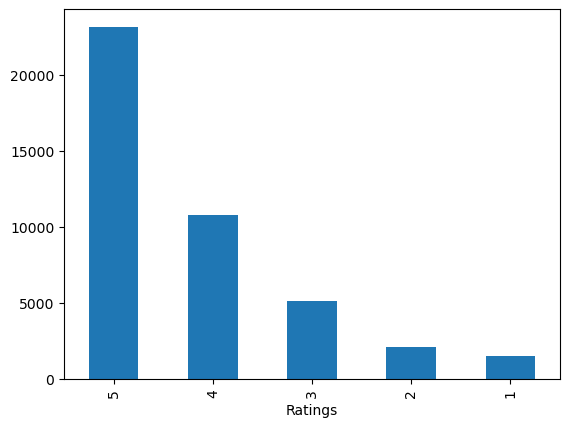

In [25]:
# Create a bar plot to visualize the distribution of ratings in the dataset
df['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Ratings')
plt.show()

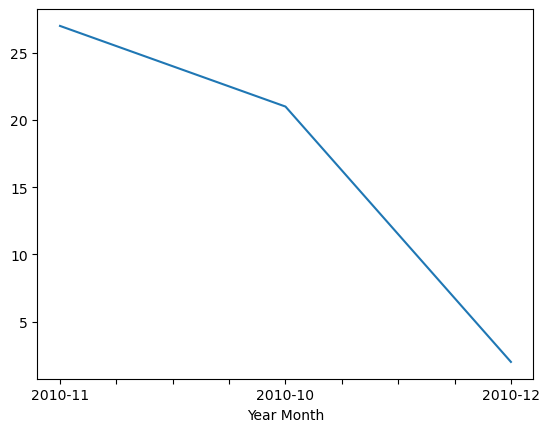

In [41]:
# Sort the DataFrame by the 'Year_Month' column in ascending order
dates = df.sort_values('Year_Month', ascending=True)
# Plot the counts of the first 50 entries in the 'Year_Month' column as a line plot
dates['Year_Month'].head(50).value_counts().plot(kind='line')
plt.xlabel('Year Month')
plt.show()

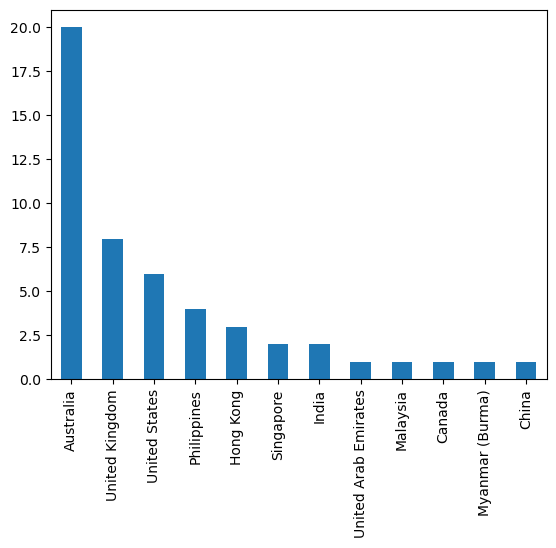

In [43]:
# Plot the counts of the 'Reviewer_Location' column for the first 50 entries as a bar plot
df['Reviewer_Location'].head(50).value_counts().plot(kind='bar')
plt.show()

# Sentiment Analysis

In [44]:
# Import the SentimentIntensityAnalyzer from the NLTK library for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
# Download the VADER lexicon, which is used by the SentimentIntensityAnalyzer for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/akshaypatil/nltk_data...


True

In [51]:
# Define a function to analyze the sentiment of a given text using VADER
def sentiment_Vader(text):
    # Get the overall polarity scores for the text
    over_all_polarity = sia.polarity_scores(text)
    # Determine the sentiment based on the compound score
    if over_all_polarity['compound'] >= 0.05:
        return "positive"
    elif over_all_polarity['compound'] <= -0.05:
        return "negative"
    else:
        return "neutral"

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [54]:
# Apply the sentiment_Vader function to each entry in the 'Review_Text' column
# and create a new column 'Sentiment' with the resulting sentiment labels
df['Sentiment'] = df['Review_Text'].apply(lambda review: sentiment_Vader(review))

In [55]:
# Display summary statistics for the 'Sentiment' column
df['Sentiment'].describe()

count        42656
unique           3
top       positive
freq         37666
Name: Sentiment, dtype: object

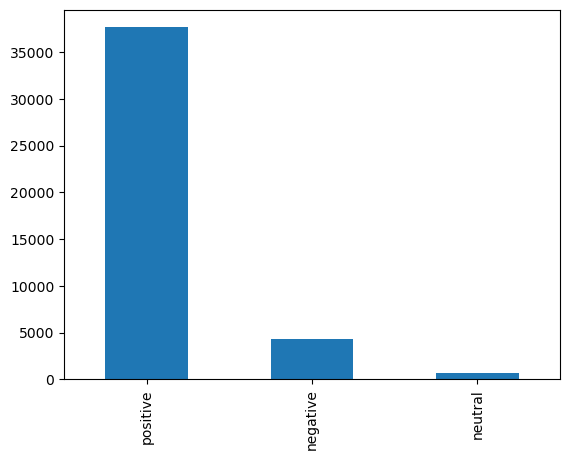

In [59]:
# Plot the counts of each sentiment category ('positive', 'negative', 'neutral') as a bar plot
df['Sentiment'].value_counts().plot(kind='bar')
plt.show()

In [60]:
# Count the occurrences of each sentiment category ('positive', 'negative', 'neutral')
df['Sentiment'].value_counts()

positive    37666
negative     4271
neutral       719
Name: Sentiment, dtype: int64

In [61]:
# Save the DataFrame, including the new 'Sentiment' column, to a CSV file
df.to_csv('/Users/akshaypatil/Desktop/Learning_Projects/Disneyland_ratings_analysis/Sentiment_Analysis.csv')